In [1]:
import numpy as np
def conv1d(x,w,p=0,s=1):
    w_rot = np.array(w[::-1])
    x_padded = np.array(x)
    
    if p>0:
        zero_pad = np.zeros(shape=p)
        x_padded = np.concatenate([
                zero_pad,x_padded,zero_pad
        ])
    res = []
    for i in range(0,int((len(x_padded) - len(w_rot))) +1,s):
        res.append(np.sum(x_padded[i:i+w_rot.shape[0]] * w_rot))
    return np.array(res)


x = [1,3,2,4,5,6,1,3]     
w = [1,0,3,1,2]

print("Conv1d Implementation:",
     conv1d(x,w,p=2,s=1))
print("Numpy results:",np.convolve(x,w,mode='same'))

Conv1d Implementation: [ 5. 14. 16. 26. 24. 34. 19. 22.]
Numpy results: [ 5 14 16 26 24 34 19 22]


For 2d convolution

In [2]:
import scipy.signal

In [3]:
import scipy.signal

def conv2d(X,W,p=(0,0),s=(1,1)):
    W_rot = np.array(W[::-1,::-1])
    X_orig = np.array(X)
    n1 = X_orig.shape[0] + 2*p[0]
    n2 = X_orig.shape[1] + 2*p[1]
    X_padded = np.zeros(shape=(n1,n2))
    X_padded[p[0]:p[0]+X_orig.shape[0],
            p[1]:p[1]+X_orig.shape[1]] = X_orig
    res = []
    
    for i in range(0,int((X_padded.shape[0]-\
                         W_rot.shape[0])/s[0])+1,s[0]):
        res.append([])
    for j in range(0,int((X_padded.shape[1] -\
                         W_rot.shape[1]/s[1])+1,s[1]):
                        X_sub = X_padded[i+i+W_rot.shape[0],
                                        j:j+W_rot.shape[1]]
                        res[-1].append(np.sum(X_sub * W_rot)))
    return (np.array(res))              

SyntaxError: invalid syntax (186869738.py, line 17)

In [4]:
X = [[1, 3, 2, 4], [5, 6, 1, 3], [1, 2, 0, 2], [3, 4, 3, 2]]
W = [[1, 0, 3], [1, 2, 1], [0, 1, 1]]
print('Scipy results:\n',scipy.signal.convolve2d(X,W,mode='same'))

Scipy results:
 [[11 25 32 13]
 [19 25 24 13]
 [13 28 25 17]
 [11 17 14  9]]


In [5]:
import torch
from torchvision.io import read_image

img = read_image("example-image.png")
print('Image Shape:',img.shape)

Image Shape: torch.Size([3, 252, 221])


In [6]:
print('Number of channels',img.shape[0])

Number of channels 3


In [7]:
print(img[:,100:102,100:102])

tensor([[[179, 182],
         [180, 182]],

        [[134, 136],
         [135, 137]],

        [[110, 112],
         [111, 113]]], dtype=torch.uint8)


Regularizing an NN with L2 regularization and dropout

In [8]:
import torch.nn as nn
loss_func = nn.BCELoss()
loss = loss_func(torch.tensor([0.9]),torch.tensor([1.0]))
l2_lambda = 0.001
conv_layer = nn.Conv2d(in_channels=3,
                      out_channels=5,
                      kernel_size=5)
l2_penalty = l2_lambda * sum([(p**2).sum() for p in conv_layer.parameters()])

loss_with_penalty = loss + l2_penalty
linear_layer = nn.Linear(10,16)
l2_penalty = l2_lambda * sum([(p**2).sum() for p in linear_layer.parameters()])

loss_with_penalty = loss + l2_penalty

In [9]:
logits = torch.tensor([0.8])
probas = torch.sigmoid(logits)
target = torch.tensor([1.0])
bce_loss_fn = nn.BCELoss()
bce_logits_loss_fn = nn.BCEWithLogitsLoss()
print(f'BCE (w Probas): {bce_loss_fn(probas,target):.4f}')

BCE (w Probas): 0.3711


In [10]:
print(f'BCE (w Logits): {bce_logits_loss_fn(logits,target):.4f}')

BCE (w Logits): 0.3711


In [11]:
logits = torch.tensor([[1.5,0.8,2.1]])
probas = torch.softmax(logits,dim=1)
target = torch.tensor([2])
cce_loss_fn = nn.NLLLoss()
cce_logits_loss_fn = nn.CrossEntropyLoss()
print(f'CCE (w Probas): {cce_loss_fn(logits,target):.4f}')
print(f'CCE (w Logits): {cce_logits_loss_fn(probas,target):.4f}')

CCE (w Probas): -2.1000
CCE (w Logits): 0.8966


Implementing a deep CNN using PyTorch

#### **Loading and preprocessing the data**

In [12]:
import torchvision
from torchvision import transforms
image_path = './'
transform = transforms.Compose([
    transforms.ToTensor()
])
mnist_dataset = torchvision.datasets.MNIST(root=image_path,train=True,
                                          transform=transform,download=False)


In [13]:
from torch.utils.data import Subset
mnist_valid_dataset = Subset(mnist_dataset,torch.arange(10000))
mnist_train_dataset = Subset(mnist_dataset,torch.arange(10000,len(mnist_dataset)))
mnist_test_dataset = torchvision.datasets.MNIST(root=image_path,train=False,
                                               transform=transform,download=False)


##### **Creating a dataloader**

In [14]:
from torch.utils.data import DataLoader
batch_size = 64
torch.manual_seed(1)
train_dl = DataLoader(mnist_train_dataset,batch_size,shuffle=True)
valid_dl = DataLoader(mnist_valid_dataset,batch_size,shuffle=False)

Implementing a CNN 

In [16]:
model = nn.Sequential()
model.add_module('conv1',
                nn.Conv2d(
                in_channels=1,out_channels=32,kernel_size=5,padding=2)
                )
model.add_module('relu',nn.ReLU())
model.add_module('pool1',nn.MaxPool2d(kernel_size=2))
model.add_module('conv2',
                nn.Conv2d(in_channels=32,out_channels=64,
                         kernel_size=5,padding=2))
model.add_module('relu',nn.ReLU())
model.add_module('pool2',nn.MaxPool2d(kernel_size=2))

In [17]:
x = torch.ones((4,1,28,28))
model(x).shape

torch.Size([4, 64, 7, 7])

In [18]:
model.add_module('flatten',nn.Flatten())
x=torch.ones((4,1,28,28))
model(x).shape

torch.Size([4, 3136])

In [19]:
model.add_module('fc1',nn.Linear(3136,1024))
model.add_module('relu3',nn.ReLU())
model.add_module('dropout',nn.Dropout(p=0.5))
model.add_module('fc2',nn.Linear(1024,10))

In [20]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

##### **Now training the model**

In [21]:
def train(model,num_epochs,train_dl,valid_dl):
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0]*num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs
    for epoch in range(num_epochs):
        model.train()
        for x_batch,y_batch in train_dl:
            pred = model(x_batch)
            loss = loss_fn(pred,y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_hist_train[epoch] += loss.item()*y_batch.size(0)
            is_correct = (torch.argmax(pred,dim=1)==y_batch).float()
            accuracy_hist_train[epoch] += is_correct.sum()
        loss_hist_train[epoch] /= len(train_dl.dataset)
        accuracy_hist_train[epoch] /= len(train_dl.dataset)
        
        model.eval()
        with torch.no_grad():
            for x_batch,y_batch in valid_dl:
                pred = model(x_batch)
                loss = loss_fn(pred,y_batch)
                loss_hist_valid[epoch] += loss.item() * y_batch.size(0)
                is_correct = (torch.argmax(pred,dim=1)==y_batch).float()
                accuracy_hist_valid[epoch] += is_correct.sum()
            loss_hist_valid[epoch] /= len(valid_dl.dataset)
            accuracy_hist_valid[epoch] /= len(valid_dl.dataset)
            
        print(f'Epoch {epoch+1} accuracy:'
             f'{accuracy_hist_train[epoch]:.4f} val_accuracy:'
             f'{accuracy_hist_valid[epoch]:.4f}')
    return loss_hist_train,loss_hist_valid,accuracy_hist_train,accuracy_hist_valid

In [22]:
torch.manual_seed(1)
num_epochs=20
hist = train(model,num_epochs,train_dl,valid_dl)

Epoch 1 accuracy:0.9507 val_accuracy:0.9793
Epoch 2 accuracy:0.9830 val_accuracy:0.9862
Epoch 3 accuracy:0.9866 val_accuracy:0.9882
Epoch 4 accuracy:0.9888 val_accuracy:0.9874
Epoch 5 accuracy:0.9914 val_accuracy:0.9869
Epoch 6 accuracy:0.9929 val_accuracy:0.9904
Epoch 7 accuracy:0.9931 val_accuracy:0.9889
Epoch 8 accuracy:0.9946 val_accuracy:0.9897
Epoch 9 accuracy:0.9939 val_accuracy:0.9900
Epoch 10 accuracy:0.9952 val_accuracy:0.9897
Epoch 11 accuracy:0.9959 val_accuracy:0.9890
Epoch 12 accuracy:0.9953 val_accuracy:0.9880
Epoch 13 accuracy:0.9966 val_accuracy:0.9898
Epoch 14 accuracy:0.9961 val_accuracy:0.9887
Epoch 15 accuracy:0.9967 val_accuracy:0.9911
Epoch 16 accuracy:0.9961 val_accuracy:0.9905
Epoch 17 accuracy:0.9972 val_accuracy:0.9902
Epoch 18 accuracy:0.9964 val_accuracy:0.9906
Epoch 19 accuracy:0.9974 val_accuracy:0.9874
Epoch 20 accuracy:0.9967 val_accuracy:0.9894


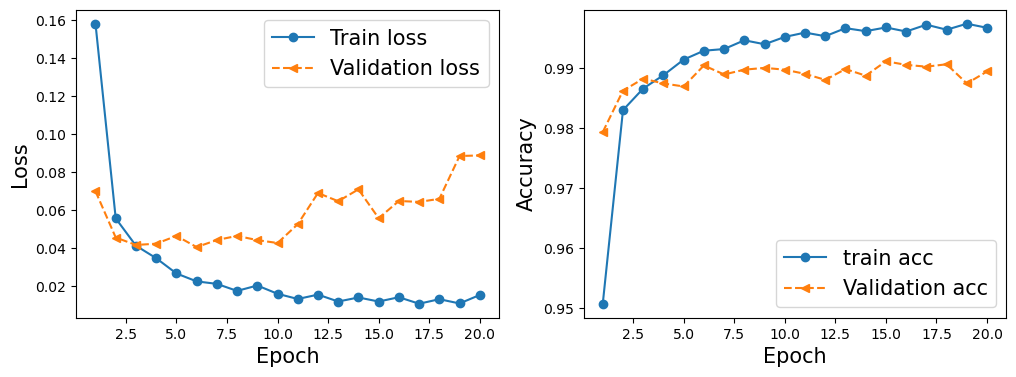

In [25]:
import matplotlib.pyplot as plt
x_arr = np.arange(len(hist[0])) +1
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1,2,1)
ax.plot(x_arr,hist[0],'-o',label='Train loss')
ax.plot(x_arr,hist[1],'--<',label='Validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch',size=15)
ax.set_ylabel('Loss',size=15)
ax = fig.add_subplot(1,2,2)
ax.plot(x_arr,hist[2],'-o',label='train acc')
ax.plot(x_arr,hist[3],'--<',label='Validation acc')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch',size=15)
ax.set_ylabel('Accuracy',size=15)
plt.show()

In [26]:
pred = model(mnist_test_dataset.data.unsqueeze(1) /255.)
is_correct = (torch.argmax(pred,dim=1)==mnist_test_dataset.targets).float()
print(f'Test accuracy: {is_correct.mean():.4f}')

Test accuracy: 0.9906


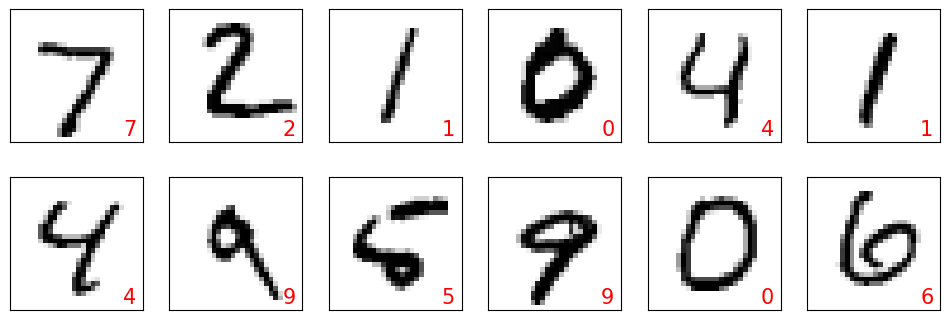

In [27]:
fig = plt.figure(figsize=(12,4))
for i in range(12):
    ax = fig.add_subplot(2,6,i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    img = mnist_test_dataset[i][0][0,:,:]
    pred = model(img.unsqueeze(0).unsqueeze(1))
    y_pred = torch.argmax(pred)
    ax.imshow(img,cmap='gray_r')
    ax.text(0.9,0.1,y_pred.item(),
           size=15,color='red',
           horizontalalignment='center',
           verticalalignment='center',
           transform = ax.transAxes)
plt.show()